In [1]:
library(tidyverse) 
library(dplyr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [2]:
download.file("https://raw.githubusercontent.com/matthewsans/DCSI-100-group-project/main/penguins_lter.csv", "penguins")
penguin_data <- read_csv("penguins")
head(penguin_data)


Rows: 344 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): studyName, Species, Region, Island, Stage, Individual ID, Clutch C...
dbl  (7): Sample Number, Culmen Length (mm), Culmen Depth (mm), Flipper Leng...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181,3750,MALE,NA,NA,Not enough blood for isotopes.
PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186,3800,FEMALE,8.94956,-24.69454,NA
PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195,3250,FEMALE,8.36821,-25.33302,NA
PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NA,NA,NA,NA,NA,NA,NA,Adult not sampled.
PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193,3450,FEMALE,8.76651,-25.32426,NA
PAL0708,6,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,39.3,20.6,190,3650,MALE,8.66496,-25.29805,NA


In [3]:
names(penguin_data)[13] <- "body_mass"
names(penguin_data)[2] <- "sample_number"
names(penguin_data)[10] <- "culmen_length"
names(penguin_data)[11] <- "culmen_depth"
names(penguin_data)[12] <- "flipper_length"
names(penguin_data)[13] <- "body_mass"
names(penguin_data)[3] <- "species"
names(penguin_data)[4] <- "region"
names(penguin_data)[5] <- "island"

set.seed(1234)
clean_penguin <- select(penguin_data, c(species, region, island, culmen_length, culmen_depth, flipper_length, body_mass))
clean_penguin <- clean_penguin |> mutate(species = as.factor(species))
head(clean_penguin)
split_penguin <- initial_split(clean_penguin, prop = 0.75, strata = species)
penguin_training <- training(split_penguin)  # USE FOR DATA VISUALATION/TRAINING
penguin_testing <- testing(split_penguin)    # DO NOT USE UNTIL FINAL TEST

species,region,island,culmen_length,culmen_depth,flipper_length,body_mass
<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,39.1,18.7,181,3750
Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,39.5,17.4,186,3800
Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,40.3,18.0,195,3250
Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,NA,NA,NA,NA
Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,36.7,19.3,193,3450
Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,39.3,20.6,190,3650


Introduction
Backgroud Information: The Antarctic region which is characterized by its extreme climate and pristine wilderness, is a critical habitat for penguins. The dataset that is used in this project is collected in the Palmer Archipelago, which is situated off the western coast of the Antarctic Peninsula, and hosts three species of penguin. 


Research Question: The research question this project is going to answer is how to predict the species of penguin based on their culmen length (mm), culmen depth (mm), flipper length (mm), and body mass (g). To answer the research question, we utilize a comprehensive dataset containing information on the three penguin species which are Chinstrap, Adélie, and Gentoo.


Description of the Dataset: The dataset encompasses critical parameters, including species type, culmen length (mm), culmen depth (mm), flipper length (mm), body mass (g), island location (Dream, Torgersen, or Biscoe), and sex of individual penguins. This dataset, carefully collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network, provides valuable insights into the ecological and morphological characteristics of penguin populations.


Methods:
The first step in our project is the Data Splitting. We will divide the penguin dataset into two subsets which are a training set and a testing set. We are planning to use a split ratio is 75:25. The second step is the Variable Selection, we will select the relevant features, culmen length, culmen depth, flipper length, and body mass for prediction. The third step is the KNN Model Building. We will specify a KNN model for classification and train the KNN model using our training set. Then we will use cross-validation to find the optimal value of k. The fourth step is the Model Evaluation. We will use the testing data to evaluate the KNN model’s performance. The following classification performance metrics will be calculated to make sure our model’s performance is good, are Accuracy (to measure the overall model accuracy in predicting penguin species), Confusion Matrix (to assess the number of true positives and negatives, as well as false positives and negatives), Precision and Recall (to evaluate the model’s sensitivity). The final step is the Visualization. We will visualize our result using multivariate histogram charts. We will plot the different variables individually on histogram charts and color the bars to represent the count from each penguin species. Then, we will line the charts up in a grid so they are easier to read.

Expected outcomes and significance:
We expect to find that some penguin species typically have certain traits. For example, maybe one of the penguin species typically has the shortest culmen length. These findings could lend insight into the penguins evolution process. If we look at specific traits that have been developed over millions of years, we could perhaps get a better picture of what the world was like when they were evolving through the specific traits they developed. This could lead to future questions involving why certain penguin species developed differently than other penguin species and, in a similar vein, questions about where they will go from here.

Warning message:
“There was 1 warning in `summarize()`.
ℹ In argument: `across(culmen_length:body_mass, mean, na.rm = TRUE)`.
ℹ In group 1: `species = Adelie Penguin (Pygoscelis adeliae)`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))”
Warning message in colnames(penguin_mean)[2:7] <- c("mean_culmen_length", "mean_culmen_depth", :
“number of items to replace is not a multiple of replacement length”


species,mean_culmen_length,mean_culmen_depth,mean_flipper_length,mean_body_mass
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Adelie Penguin (Pygoscelis adeliae),38.83097,18.35575,190.0619,3700.442
Chinstrap penguin (Pygoscelis antarctica),48.75882,18.38627,195.8235,3734.314
Gentoo penguin (Pygoscelis papua),47.28602,14.98710,217.1290,5063.172


Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


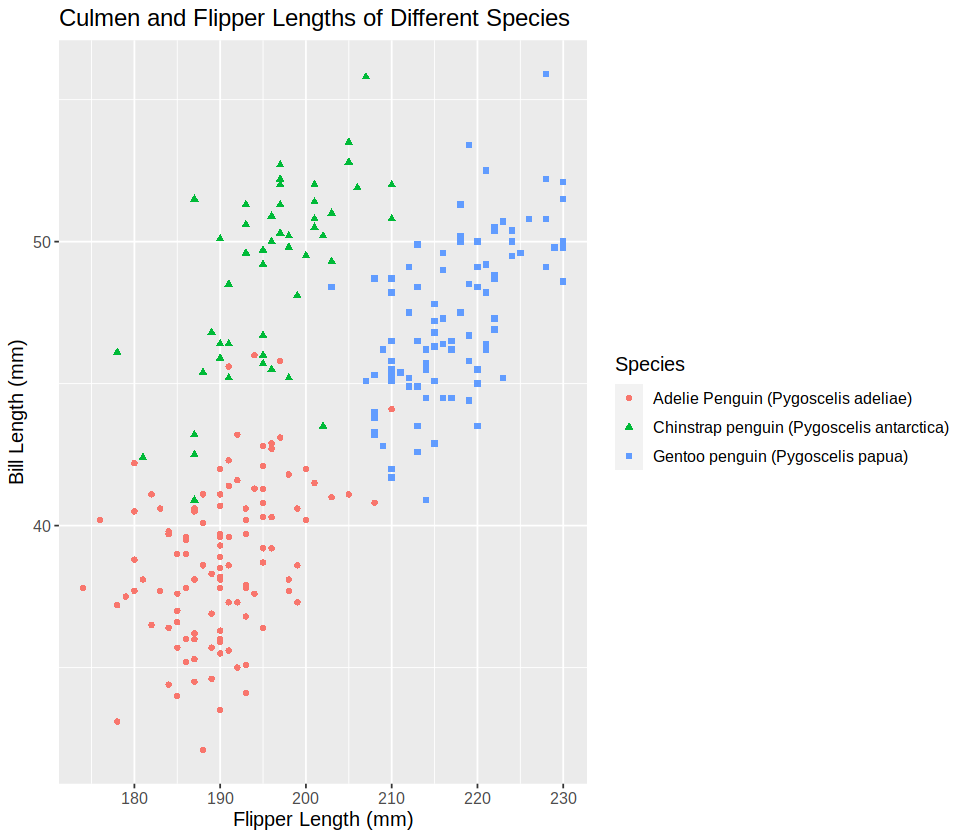

In [4]:

penguin_mean <- penguin_training |>
      group_by(species) |>
      summarize(across(culmen_length:body_mass, mean, na.rm = TRUE))
colnames(penguin_mean)[2:7] <- c("mean_culmen_length", "mean_culmen_depth", "mean_flipper_length", "mean_body_mass")
head(penguin_mean)
penguin_na <- sum(is.na(penguin_training))
penguin_explore <- mutate(penguin_mean, total_na = penguin_na)

#Visualization
options(repr.plot.width = 8, repr.plot.length = 3)
penguin_visual <- ggplot(penguin_training, aes(x = flipper_length, y = culmen_length, color = species, shape = species)) +
    geom_point() + 
    labs(x = "Flipper Length (mm)", y = "Bill Length (mm)", color = "Species", shape = "Species") +
    ggtitle("Culmen and Flipper Lengths of Different Species") +
    theme(text = element_text(size = 12)) 
penguin_visual